In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

## Discrete Fourier Transform (DFT)

The Discrete Fourier Transform (DFT) is a fundamental mathematical operation in signal processing used to analyze and transform a discrete signal from the time domain to the frequency domain.

### DFT Equation

The DFT is represented by the following equations:

**Forward DFT:**
$F[m] = \sum_{n=0}^{M-1} f[n] \cdot e^{-j 2 \pi m n /N}$

**Inverse DFT:**
$f[n] = \frac{1}{M} \sum_{m=0}^{M-1} F[m] \cdot e^{j 2 \pi m n /N}$

Where:
- $F[m]$: DFT coefficient at frequency index $m$.
- $f[n]$: Signal values at discrete time index $n$.
- $N$: Total number of samples (often a power of 2 for FFT algorithms).
- $M$: Number of samples used in the DFT computation.
- $m$: Frequency bin index.
- $\Delta T$: Sampling time interval.
- $R$: Sampling rate (number of samples per unit time).

### Frequency Representation

The frequency index $m$ corresponds to different frequencies in the signal. It is related to the actual frequency by the formula:

$frequency = \frac{m}{M\Delta T} = \frac{mR}{M}$, where $m = 0, 1, \ldots, M-1$

### Nyquist Frequency

The Nyquist frequency, denoted as $\frac{R}{2}$, is a critical concept in signal processing. It represents half of the sampling rate ($\frac{R}{2}$) and is the maximum frequency that can be accurately represented in the DFT. i.e., $\frac{1}{2 \Delta T}$. Frequencies beyond the Nyquist frequency are subject to aliasing, a phenomenon where they "fold" back into the visible spectrum.

### Notable Parameters

- $M$: The number of samples considered in the DFT.
- $m$: The frequency bin index, indicating the frequency component.
- $\Delta T$: The time interval between samples.
- $R$: The sampling rate, representing the number of samples per unit time.

For a more detailed understanding of the DFT and its applications, you can refer to the resource provided in [this link](https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf).


sampling_time=0.125s sampling_rate=8Hz freq_nyquist=4.0Hz


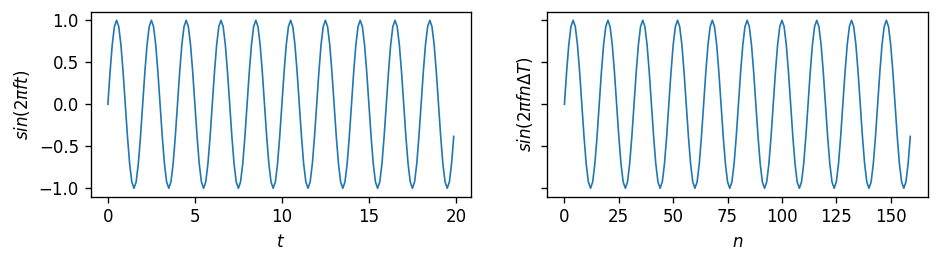

In [4]:
freq = 0.5       # signal frequency
R = 8            # sampling rate
delta_T = 1 / R  # sampling time (interval)
T = 20           # function interval [0, T] 
M = T * R        # number of samples
t = np.linspace(0, T, M, endpoint=False)
f_n = np.sin(2 * np.pi * freq * t) # sampled function
print(f"sampling_time={delta_T}s sampling_rate={R}Hz freq_nyquist={0.5*R}Hz")

fig, axs = plt.subplots(1, 2, figsize=(9, 2), sharey=True, dpi=120)
axs[0].plot(t, f_n, linewidth=1)
axs[0].set_ylabel("$sin(2 \pi f t)$")
axs[0].set_xlabel("$t$")
axs[1].plot(np.arange(t.size), f_n, linewidth=1)
axs[1].set_ylabel("$sin(2 \pi f n \Delta T)$")
axs[1].set_xlabel("$n$")
plt.show()

In [5]:
freq_min = 1 / (M * delta_T)       # one cycle per sequence (min. freq. disregarding the DC component)
freq_max = (M - 1) / (M * delta_T) # one cycle per interval (above the Nyquist frequency)
freq_nyquist = 1 / (2 * delta_T)   # Nyquist (R / 2)
print(f"freq_min={freq_min:.2f}Hz freq_max={freq_max:.2f}Hz freq_nyquist={freq_nyquist:.2f}Hz")

freq_min=0.05Hz freq_max=7.95Hz freq_nyquist=4.00Hz


The original signal has frequency $0{,}5 \text{ Hz}$ and it was sampled at $R=8 \text{ Hz}$, generating a total of $M=160$ samples.

The frequency bin $m$ represents a frequency $f = \frac{m}{M} R= \frac{m}{M\Delta T}$, therefore, the signal frequence corresponds to $m = \frac{M}{R}f$.

* For the signal frequency, $f = 0{,}5 \text{ Hz}$, we have that $m = 10$.
* For the Nyquist frequency, $f_{Nyquist} = \frac{R}{2} = 4 \text{ Hz}$, $m = \frac{M}{2} = 80$.

F_k[10]=-0.00-80.00j F_k[160-10]=-0.00+80.00j phase[10]=-1.570796326794898 phase[160-10]=1.570796326794898


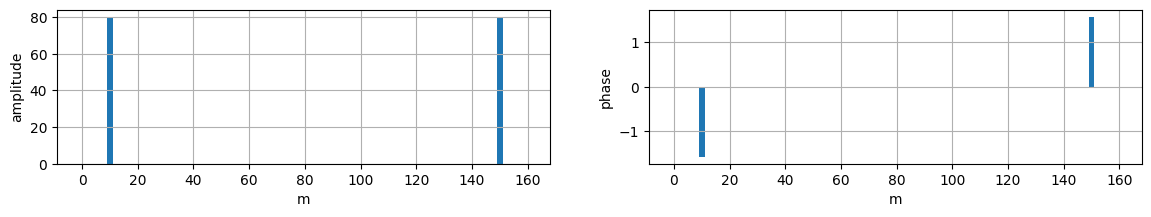

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(14,2))
F_k = np.fft.fft(f_n)
amp = np.abs(F_k)
phase = np.arctan2(F_k.imag, F_k.real) * (amp > 0.01)

print(f"F_k[10]={F_k[10]:.2f} F_k[160-10]={F_k[150]:.2f} phase[10]={phase[10]} phase[160-10]={phase[150]}")
axs[0].bar(np.arange(M), amp, width=2) # bar plot does not account for the order of freqs/amp
axs[1].bar(np.arange(M), phase, width=2) # bar plot does not account for the order of freqs/amp
axs[0].set_xlabel("m")
axs[1].set_xlabel("m")
axs[0].set_ylabel("amplitude")
axs[1].set_ylabel("phase")
axs[0].grid()
axs[1].grid()

# plt.xlim([-100, 100])
plt.show()